# 匯入Tensorflow套件

In [1]:
import tensorflow
if tensorflow.__version__.startswith('1.'):
    import tensorflow as tf
    from tensorflow.python.platform import gfile
else:
    import tensorflow as v2
    import tensorflow.compat.v1 as tf
    tf.disable_v2_behavior()
    import tensorflow.compat.v1.gfile as gfile
print("Tensorflow version:{}".format(tf.__version__))

Instructions for updating:
non-resource variables are not supported in the long term
Tensorflow version:2.5.0


# 匯入其他套件

In [2]:
import matplotlib.pyplot as plt
import os
import math
import numpy as np
import json

# 匯入資料集mnist

In [47]:
 (img_train, label_train), (img_test, label_test) = tf.keras.datasets.mnist.load_data()

# 匯入資料集fashion mnist

In [77]:
#  (img_train, label_train), (img_test, label_test) = tf.keras.datasets.fashion_mnist.load_data()

# 匯入資料集cifar 10

In [36]:
#  (img_train, label_train), (img_test, label_test) = tf.keras.datasets.cifar10.load_data()

In [48]:
print("img_train type:",type(img_train))
print("img_train shape:",img_train.shape)
print("img_train dtype:",img_train.dtype)
print("label_train type:",type(label_train))
print("label_train shape:",label_train.shape)
print("label_train dtype:",label_train.dtype)

img_train type: <class 'numpy.ndarray'>
img_train shape: (60000, 28, 28)
img_train dtype: uint8
label_train type: <class 'numpy.ndarray'>
label_train shape: (60000,)
label_train dtype: uint8


In [49]:
print("img_test type:",type(img_test))
print("img_test shape:",img_test.shape)
print("img_test dtype:",img_test.dtype)
print("label_test type:",type(label_test))
print("label_test shape:",label_test.shape)
print("label_test dtype:",label_test.dtype)

img_test type: <class 'numpy.ndarray'>
img_test shape: (10000, 28, 28)
img_test dtype: uint8
label_test type: <class 'numpy.ndarray'>
label_test shape: (10000,)
label_test dtype: uint8


# 訓練cifar10時，label要縮減維度

In [50]:
# print("縮減維度之前:",label_train.shape)
# label_train = np.squeeze(label_train)
# label_test = np.squeeze(label_test)

# print("縮減維度之後:",label_train.shape)

# 建立label轉換成類別名稱的字典集

In [51]:
#----mnist
label2classname_dict = {0:'zero',
                        1:"one",
                        2:"two",
                        3:"three",
                        4:"four",
                        5:"five",
                        6:"six",
                        7:"seven",
                        8:'eight',
                        9:"nine"}

In [80]:
#----fashion mnist
# label2classname_dict = {0:'T-shirt',
#                         1:"Trouser",
#                         2:"Pullover",
#                         3:"Dress",
#                         4:"Coat",
#                         5:"Sandal",
#                         6:"Shirt",
#                         7:"Sneaker",
#                         8:'Bag',
#                         9:"Ankle boot"}

In [10]:
# #----cifar 10
# label2classname_dict = {0:'airplane',
#                         1:"automobile",
#                         2:"bird",
#                         3:"cat",
#                         4:"deer",
#                         5:"dog",
#                         6:"frog",
#                         7:"horse",
#                         8:'ship',
#                         9:"truck"}

# 圖片顯示函數

In [11]:
def image_random_show(img_data,label_data,label2classname_dict,row=3,column=3):
    a = np.array([1])
    random_list = np.random.randint(0,img_data.shape[0], int(row * column))                           
    print("random_list:",random_list)
    
    #----設定圖片大小
    plt.figure(figsize=(7,7))
    #----display
    for i, rdm_number in enumerate(random_list):
        label = label_data[rdm_number]
        if type(label) == type(a):
            label = label[0]
        classname = label2classname_dict[label]

        plt.subplot(column,row,i+1)
        plt.axis('off')
        plt.title("{}".format(classname))
        
        if img_data.ndim == 3:
            plt.imshow(img_data[rdm_number],cmap='gray')
        else:
            plt.imshow(img_data[rdm_number])

    plt.show()

random_list: [  440 27045 11226 37642 15759 26498  5874 15089 29942 35213 56119 43216
 10930 47983 32927 56647 51283 35997 29652 18668 57999 42072 44223  3504
 27475]


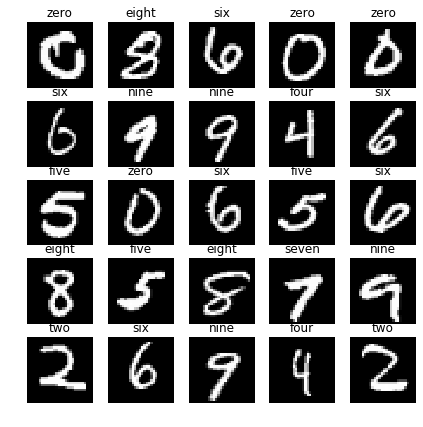

In [52]:
image_random_show(img_train,label_train,label2classname_dict=label2classname_dict,row=5,column=5)

# 資料集的前處理

In [60]:
#單色圖片的資料集才需要擴增維度，若訓練cifar 10，就不用執行此程式碼
img_train = np.expand_dims(img_train,axis=-1)
print("img_train shape:",img_train.shape)

img_train shape: (60000, 28, 28, 1)


In [61]:
#單色圖片的資料集才需要擴增維度，若訓練cifar 10，就不用執行此程式碼
img_test = np.expand_dims(img_test,axis=-1)
print("img_test shape:",img_test.shape)

img_test shape: (10000, 28, 28, 1)


In [62]:
img_train = img_train.astype(np.float32)
print("img_train dtype:",img_train.dtype)

img_train /= 255
print("資料最小值 = ",np.min(img_train))
print("資料最大值 = ",np.max(img_train))

img_train dtype: float32
資料最小值 =  0.0
資料最大值 =  1.0


In [63]:
img_test = img_test.astype(np.float32)
print("img_test dtype:",img_test.dtype)

img_test /= 255
print("資料最小值 = ",np.min(img_test))
print("資料最大值 = ",np.max(img_test))

img_test dtype: float32
資料最小值 =  0.0
資料最大值 =  1.0


# 建立計算圖

In [54]:
graph_1 = tf.Graph()
activation = tf.nn.relu
save_dir = r"D:\code\model_saver\mnist_CNN"

In [65]:
with graph_1.as_default():
    #----建立tf.placeholder()，接收非張量型態的資料
    tf_input = tf.placeholder(tf.float32,shape=[None,28,28,1],name='input')
    tf_label = tf.placeholder(tf.int32,shape=[None],name="label")
    tf_keep_prob = tf.placeholder(tf.float32,name='keep_prob')

    #----建立類神經網路
    net = tf.layers.conv2d(
        inputs=tf_input,
        filters=8,
        kernel_size=[3, 3],
        padding="same",
        strides=1,
        activation=activation
    )
    print("卷積層 1 shape:",net.shape)

    net = tf.layers.max_pooling2d(net, pool_size=[2, 2], strides=2,padding='same')
    print("池化層 1 shape:",net.shape)

    net = tf.layers.conv2d(
        inputs=net,
        filters=16,
        kernel_size=[3, 3],
        padding="same",
        strides=1,
        activation=activation
    )
    print("卷積層 2 shape:",net.shape)

    net = tf.layers.max_pooling2d(net, pool_size=[2, 2], strides=2,padding='same')
    print("池化層 2 shape:",net.shape)

    net = tf.layers.conv2d(
        inputs=net,
        filters=32,
        kernel_size=[3, 3],
        padding="same",
        strides=1,
        activation=activation
    )
    print("卷積層 3 shape:",net.shape)

    net = tf.layers.max_pooling2d(net, pool_size=[2, 2], strides=2,padding='same')
    print("池化層 3 shape:",net.shape)

    net = tf.layers.flatten(net)
    print("陣列拉直後 shape:",net.shape)

    net = tf.layers.dense(inputs=net, units=64, activation=activation)
    print("全連接層 shape:",net.shape)

    net = tf.nn.dropout(net, keep_prob=tf_keep_prob)#加入dropout

    output = tf.layers.dense(inputs=net, units=10, activation=None)#輸出層就不需使用激勵函數
    print("輸出層 shape:",output.shape)

    #----softmax函數輸出各類別的機率
    tf_prediction = tf.nn.softmax(output,name="prediction")

     #----設定損失函數
    tf_loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=tf_label,logits=output),
                      name="loss")

    #----設定最佳化函數
    learning_rate = 1e-4
    tf_optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(tf_loss)

    #----設定儲存權重的資料夾
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    saver = tf.train.Saver(max_to_keep=5)

    #----GPU 資源設定
    config = tf.ConfigProto(log_device_placement=True,
                            allow_soft_placement=True)
    config.gpu_options.allow_growth = True

    sess = tf.Session(config=config)
    sess.run(tf.global_variables_initializer())

卷積層 1 shape: (?, 28, 28, 8)
池化層 1 shape: (?, 14, 14, 8)
卷積層 2 shape: (?, 14, 14, 16)
池化層 2 shape: (?, 7, 7, 16)
卷積層 3 shape: (?, 7, 7, 32)
池化層 3 shape: (?, 4, 4, 32)
陣列拉直後 shape: (?, 512)
全連接層 shape: (?, 64)
輸出層 shape: (?, 10)
Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1



# 計算訓練的參數數量

In [19]:
def get_qty_var(tf_graph):
    qty = 0
    with tf_graph.as_default():
        for var in tf.global_variables():
            
            if var.trainable:
                shape = var.shape
                for i,num in enumerate(shape):
                    if i == 0:
                        product = num
                    else:
                        product *= num
                qty += product 

        print("參數數量 = ",qty)

In [58]:
get_qty_var(graph_1)

參數數量 =  112500


# 選取迭代資料函數

In [21]:
def get_ite_data(img_data,label_data,ite_num,batch_size):
    num_start = batch_size * ite_num
    num_end = num_start + batch_size
    if num_end > img_data.shape[0]:
        num_end = img_data.shape[0]
    
    ite_data = img_data[num_start:num_end]
    ite_label = label_data[num_start:num_end]
    
    return ite_data,ite_label

# 計算損失值函數

In [22]:
def get_loss(img_data,label_data,batch_size,sess,use_dropout=False):
    iterations =math.ceil(img_data.shape[0] / batch_size)
    loss = 0
    
    for iteration in range(iterations):
        ite_data,ite_label = get_ite_data(img_data,label_data,iteration,batch_size)
        
        if use_dropout is False:
            loss += sess.run(tf_loss,feed_dict={tf_input:ite_data,tf_label:ite_label})
        else:
            loss += sess.run(tf_loss,feed_dict={tf_input:ite_data,
                                                tf_label:ite_label,
                                                tf_keep_prob:1})
    
    loss /= iterations
    
    return loss

# 計算準確率函數

In [23]:
def get_accuracy(img_data,label_data,batch_size,sess,use_dropout=False):
    iterations = math.ceil(img_data.shape[0] / batch_size)
    correct_count = 0
    prediction_count = 0
    
    for iteration in range(iterations):
        ite_data,ite_label = get_ite_data(img_data,label_data,iteration,batch_size)
        
        if use_dropout is False:
            predictions = sess.run(tf_prediction,feed_dict={tf_input:ite_data})
        else:
            predictions = sess.run(tf_prediction,feed_dict={tf_input:ite_data,
                                                #tf_label:ite_label,
                                                tf_keep_prob:1})
        
        arg_predictions = np.argmax(predictions,axis=1)
        for arg_prediction, label in zip(arg_predictions,ite_label):
            prediction_count += 1
            if arg_prediction == label:
                correct_count += 1
    acc = correct_count / prediction_count
    
    return acc

# 儲存PB檔案

In [24]:
def save_pb_file(graph,sess,tf_node_list,pb_save_path):
    graph = graph.as_graph_def()
#     graph = tf.get_default_graph().as_graph_def()
    output_graph_def = tf.graph_util.convert_variables_to_constants(sess, graph, tf_node_list)
    with gfile.GFile(pb_save_path, 'wb')as f:
        f.write(output_graph_def.SerializeToString())
    msg = "儲存pb檔至 {}".format(pb_save_path)
    print(msg)

# 訓練程式碼函數

In [25]:
batch_size=128
epochs=50
dropout_ratio=0.5  

In [66]:
acc_record = 0.9
#----計算迭代次數
iterations_train =math.ceil(img_train.shape[0] / batch_size)
iterations_test = math.ceil(img_test.shape[0] / batch_size )

#----宣告收集損失值與準確率的串列
loss_train_list = list()
acc_train_list = list()
loss_test_list = list()
acc_test_list = list()

#----載入上次的訓練權重檔案
weights_path = tf.train.latest_checkpoint(save_dir)
if weights_path is not None:
    print("weights_path:",weights_path)
    try:
        saver.restore(sess, weights_path)
        print("使用之前的權重檔:{}".format(weights_path))   
    except:
        print("套用權重檔產生錯誤，重新訓練")

for epoch in range(epochs):
    #----shuffle就像撲克牌洗牌，將圖案的順序打亂
    indice = np.random.permutation(len(img_train))
    img_train = img_train[indice]
    label_train = label_train[indice]
    
    for iteration in range(iterations_train):
        ite_data,ite_label = get_ite_data(img_train,label_train,iteration,batch_size)
        if dropout_ratio is None:
            sess.run(tf_optimizer,feed_dict={tf_input:ite_data,tf_label:ite_label})
        else:
            sess.run(tf_optimizer,feed_dict={tf_input:ite_data,
                                             tf_label:ite_label,
                                             tf_keep_prob:1-dropout_ratio})

    #----計算訓練集的損失值與準確率
    if dropout_ratio is None:
        loss_train = get_loss(img_train,label_train,batch_size,sess)
        acc_train = get_accuracy(img_train,label_train,batch_size,sess)
    else:
        loss_train = get_loss(img_train,
                              label_train,
                              batch_size,sess,
                              use_dropout=True)
        acc_train = get_accuracy(img_train,
                                 label_train,
                                 batch_size,sess,
                                 use_dropout=True)
    print("Epoch ",epoch)
    print("訓練集 損失值 = ",loss_train)
    print("訓練集 準確率 = ",acc_train)

    #----收集訓練集損失值與準確率數值至串列
    loss_train_list.append(float(loss_train))
    acc_train_list.append(float(acc_train))

    #----計算驗證集的損失值與準確率
    if dropout_ratio is None:
        loss_test = get_loss(img_test,label_test,batch_size,sess)
        acc_test = get_accuracy(img_test,label_test,batch_size,sess)
    else:
        loss_test = get_loss(img_test,
                              label_test,
                              batch_size,sess,
                              use_dropout=True)
        acc_test = get_accuracy(img_test,
                                 label_test,
                                 batch_size,sess,
                                 use_dropout=True)

    print("驗證集 損失值 = ",loss_test)
    print("驗證集 準確率 = ",acc_test)

    #----收集驗證集損失值與準確率數值至串列
    loss_test_list.append(float(loss_test))
    acc_test_list.append(float(acc_test))

    #----儲存權重檔案
    save_filename = os.path.join(save_dir,'model')
    model_save_path = saver.save(sess, save_filename, global_step=epoch)
    print("儲存權重檔至 {}".format(model_save_path))
    
    #----儲存準確率最高的PB檔案
    if acc_test > acc_record:
        pb_save_path = "infer_acc_{}.pb".format(acc_test)
        pb_save_path = os.path.join(save_dir,pb_save_path)
        print("pb_save_path:",pb_save_path)
#         pb_save_path = os.path.join(save_dir,'inference.pb')
        save_pb_file(graph_1,sess,['prediction'],pb_save_path)
        acc_record = acc_test
        
    #----儲存訓練集與驗證集的損失值與準確率
    json_path = os.path.join(save_dir,'train_result.json')
    data_dict = {'loss_train_list':loss_train_list,
                 'acc_train_list':acc_train_list,
                 'loss_test_list':loss_test_list,
                 'acc_test_list':acc_test_list,
              }
    with open(json_path,'w') as file_obj:
        json.dump(data_dict,file_obj)


weights_path: D:\code\model_saver\mnist_CNN\model-49
INFO:tensorflow:Restoring parameters from D:\code\model_saver\mnist_CNN\model-49
套用權重檔產生錯誤，重新訓練
Epoch  0
訓練集 損失值 =  0.5626862219401768
訓練集 準確率 =  0.8572
驗證集 損失值 =  0.5447772852604902
驗證集 準確率 =  0.8686
儲存權重檔至 D:\code\model_saver\mnist_CNN\model-0
Epoch  1
訓練集 損失值 =  0.27784082315750974
訓練集 準確率 =  0.9239166666666667
驗證集 損失值 =  0.2675406727704066
驗證集 準確率 =  0.9269
儲存權重檔至 D:\code\model_saver\mnist_CNN\model-1
pb_save_path: D:\code\model_saver\mnist_CNN\infer_acc_0.9269.pb
Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
儲存pb檔至 D:\code\model_saver\mnist_CNN\infer_acc_0.9269.pb
Epoch  2
訓練集 損失值 =  0.20260383906776208
訓練集 準確率 =  0.9401833333333334
驗證集 損失值 =  0.19413860158735438
驗證集 準確率 =  0.9418
儲存權重檔至 D:\code\model_saver\mnist_CNN\model-2
pb_save_path: D:\code\model_saver\mnist_CNN\infer_acc_0.9418.pb
儲存pb檔至 D:\code\model_saver

驗證集 損失值 =  0.04622655084317615
驗證集 準確率 =  0.9841
儲存權重檔至 D:\code\model_saver\mnist_CNN\model-30
pb_save_path: D:\code\model_saver\mnist_CNN\infer_acc_0.9841.pb
儲存pb檔至 D:\code\model_saver\mnist_CNN\infer_acc_0.9841.pb
Epoch  31
訓練集 損失值 =  0.045223093900912954
訓練集 準確率 =  0.9859666666666667
驗證集 損失值 =  0.04604528279733016
驗證集 準確率 =  0.9838
儲存權重檔至 D:\code\model_saver\mnist_CNN\model-31
Epoch  32
訓練集 損失值 =  0.04671771492638282
訓練集 準確率 =  0.9850166666666667
驗證集 損失值 =  0.047520394940529745
驗證集 準確率 =  0.9836
儲存權重檔至 D:\code\model_saver\mnist_CNN\model-32
Epoch  33
訓練集 損失值 =  0.043376544015859365
訓練集 準確率 =  0.9866666666666667
驗證集 損失值 =  0.04602497005341515
驗證集 準確率 =  0.9843
儲存權重檔至 D:\code\model_saver\mnist_CNN\model-33
pb_save_path: D:\code\model_saver\mnist_CNN\infer_acc_0.9843.pb
儲存pb檔至 D:\code\model_saver\mnist_CNN\infer_acc_0.9843.pb
Epoch  34
訓練集 損失值 =  0.042604296918469925
訓練集 準確率 =  0.9867333333333334
驗證集 損失值 =  0.04540431913123997
驗證集 準確率 =  0.9846
儲存權重檔至 D:\code\model_saver\mnist_CNN\mode

# 結果圖形化函數

In [67]:
def get_plots(*args):
    loss_train_list = args[0]
    acc_train_list = args[1]
    loss_test_list = args[2]
    acc_test_list = args[3]
    
    x_num = [i for i in range(0,len(loss_train_list))]

    plt.figure(figsize=(12,4))#圖形的大小可以自行設定

    plt.subplot(1,2,1)#設定第1張圖
    plt.plot(x_num,loss_train_list,label='train data')
    plt.plot(x_num,loss_test_list,label='test data')
    plt.xlabel("epoch")
    plt.ylabel("loss ")
    plt.legend()

    plt.subplot(1,2,2)#設定第2張圖
    plt.plot(x_num,acc_train_list,label='train data')
    plt.plot(x_num,acc_test_list,label='test data')
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.legend()

    plt.show()#所有圖都設定完再執行show()
    
    arg_train = np.argmax(acc_train_list)
    best_acc_train = acc_train_list[arg_train]
    print("訓練集最高的準確率為{}，出現在epoch {}".format(best_acc_train,arg_train))

    arg_test = np.argmax(acc_test_list)
    best_acc_test = acc_test_list[arg_test]
    print("驗證集最高的準確率為{}，出現在epoch {}".format(best_acc_test,arg_test))

# 使用train_result資料進行圖形化

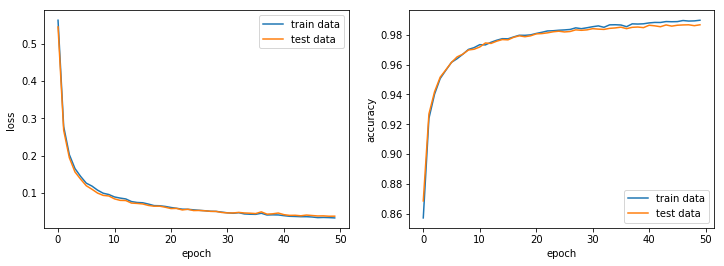

訓練集最高的準確率為0.98975，出現在epoch 49
驗證集最高的準確率為0.9867，出現在epoch 47


In [68]:
json_path = r"D:\code\model_saver\mnist_CNN\train_result.json"

with open(json_path,'r') as file_obj:
    data_dict = json.load(file_obj)

loss_train_list = data_dict['loss_train_list']
acc_train_list = data_dict['acc_train_list']
loss_test_list = data_dict['loss_test_list']
acc_test_list = data_dict['acc_test_list']

get_plots(loss_train_list,acc_train_list,loss_test_list,acc_test_list)

# 使用PB檔案進行推論

In [70]:
def model_restore_from_pb(pb_path,node_dict,GPU_ratio=None):
    tf_node_dict = dict()
    with tf.Graph().as_default():
        config = tf.ConfigProto(log_device_placement=True,
                                allow_soft_placement=True,
                                )
        if GPU_ratio is None:
            config.gpu_options.allow_growth = True  
        else:
            config.gpu_options.per_process_gpu_memory_fraction = GPU_ratio 

        sess_pb = tf.Session(config=config)
        with gfile.FastGFile(pb_path, 'rb') as f:
            content = f.read()
            graph_def = tf.GraphDef()
            graph_def.ParseFromString(content)
            sess_pb.graph.as_default()
            
            tf.import_graph_def(graph_def, name='')  # 匯入計算圖

        sess_pb.run(tf.global_variables_initializer())
        for key,value in node_dict.items():
            try:
                node = sess_pb.graph.get_tensor_by_name(value)
                tf_node_dict[key] = node
            except:
                print("節點名稱:{}不存在".format(key))
        return sess_pb,tf_node_dict

In [71]:
pb_path = r"D:\code\model_saver\mnist_CNN\infer_acc_0.9903.pb"
nodename_dict = {
                'input': 'input:0',
                'keep_prob': 'keep_prob:0',
                'prediction': 'prediction:0'
                 }
sess_infer,tf_node_dict = model_restore_from_pb(pb_path,nodename_dict,GPU_ratio=None)
tf_node_dict

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1

Instructions for updating:
Use tf.gfile.GFile.


{'input': <tf.Tensor 'input:0' shape=(?, 28, 28, 1) dtype=float32>,
 'keep_prob': <tf.Tensor 'keep_prob:0' shape=<unknown> dtype=float32>,
 'prediction': <tf.Tensor 'prediction:0' shape=(?, 10) dtype=float32>}

In [72]:
iterations = math.ceil(img_test.shape[0] / batch_size)
correct_count = 0
prediction_count = 0
wrong_idx_list = list()
pred_list = list()
ans_list = list()

#----取出推論的節點
pb_prediction = tf_node_dict['prediction']
pb_input = tf_node_dict['input']
pb_keep_prob = tf_node_dict['keep_prob']

for iteration in range(iterations):
   
    ite_data,ite_label = get_ite_data(img_test,label_test,iteration,batch_size)

    predictions = sess_infer.run(pb_prediction,
                                 feed_dict={pb_input:ite_data, pb_keep_prob:1})
        
    arg_predictions = np.argmax(predictions,axis=1)
   
    for arg_prediction, label in zip(arg_predictions,ite_label):
        idx = prediction_count
        prediction_count += 1
        if arg_prediction == label:
            correct_count += 1
        else:
            wrong_idx_list.append(idx)
            pred_list.append(arg_prediction)
            ans_list.append(label)
            
acc = correct_count / prediction_count
print(acc)

0.9903


# 挑出錯誤的圖片並恢復圖片格式

In [73]:
img_test_selected = img_test[wrong_idx_list]
print("驗證集錯誤的圖片shape:",img_test_selected.shape)

img_test_selected = np.reshape(img_test_selected,[-1,28,28])
print("reshape後:",img_test_selected.shape)

img_test_selected *= 255
img_test_selected = img_test_selected.astype(np.uint8)

驗證集錯誤的圖片shape: (97, 28, 28, 1)
reshape後: (97, 28, 28)


# 觀看預測錯誤的圖片

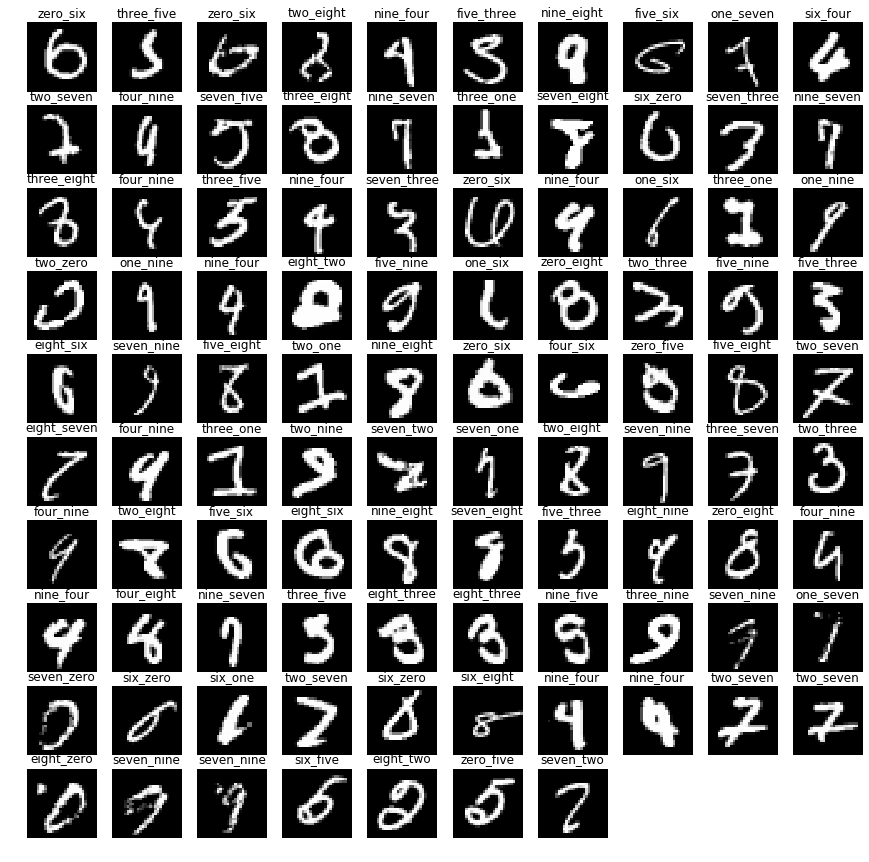

In [74]:
plt_num = math.ceil(np.sqrt(len(img_test_selected)))
#----設定圖片大小
plt.figure(figsize=(15,15))
for idx,img_wrong in enumerate(img_test_selected):
    plt.subplot(plt_num,plt_num,idx+1)
    plt.imshow(img_wrong,cmap='gray')
    plt.axis('off')
    title = "{}_{}".format(label2classname_dict[pred_list[idx]],label2classname_dict[ans_list[idx]])
    plt.title(title)
plt.show()
# image_random_show(img_test_selected,pred_list,label2classname_dict=label2classname_dict,row=5,column=5)

# 附錄:查看卷積網路每一層的特徵圖

In [105]:
pb_path = r"D:\code\model_saver\mnist_CNN\infer_acc_0.9923.pb"
nodename_dict = {'input': 'input:0',
                 'keep_prob': 'keep_prob:0',
#                  'conv_1': 'conv2d/Conv2D:0',
                 'conv_1': 'conv2d/Relu:0',
#                  'conv_1': 'conv2d/BiasAdd:0',
#                  'conv_1': 'max_pooling2d/MaxPool:0',
                 'conv_2':'conv2d_1/Relu:0',
                 'conv_3':'conv2d_2/Relu:0'
                 }
sess_infer,tf_node_dict = model_restore_from_pb(pb_path,nodename_dict,GPU_ratio=None)
#----取出推論的節點
pb_conv_1 = tf_node_dict['conv_1']
pb_conv_2 = tf_node_dict['conv_2']
pb_conv_3 = tf_node_dict['conv_3']
pb_input = tf_node_dict['input']
pb_keep_prob = tf_node_dict['keep_prob']

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1



In [106]:
rdm_num = np.random.randint(len(img_test))
print("rdm_num:",rdm_num)
img_a = img_test[rdm_num:rdm_num+1]

conv_1 = sess_infer.run(pb_conv_1,feed_dict={pb_input:img_a, pb_keep_prob:1})
conv_2 = sess_infer.run(pb_conv_2,feed_dict={pb_input:img_a, pb_keep_prob:1})
conv_3 = sess_infer.run(pb_conv_3,feed_dict={pb_input:img_a, pb_keep_prob:1})

rdm_num: 7140


In [107]:
print(np.max(img_a))

1.0


img_ori shape: (28, 28)
img_ori dtype: uint8


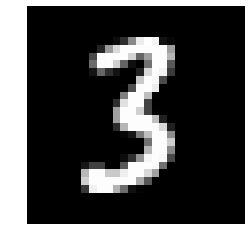

In [108]:
img_ori = img_a.copy()
img_ori = np.reshape(img_ori,(28,28))
img_ori *= 255
# img_ori = np.clip(img_ori,0,255)
img_ori = img_ori.astype(np.uint8)
print('img_ori shape:',img_ori.shape)
print('img_ori dtype:',img_ori.dtype)

plt.imshow(img_ori,cmap='gray')
plt.axis('off')
plt.show()

In [109]:
def show_conv_img(input_data):
    conv_data = input_data.copy()
    shape = conv_data.shape
    #----設定圖片大小
    plt.figure(figsize=(7,7))
#     img_data = np.swapaxes(conv_data,0,-1)
#     print(img_data.shape)
    img_data = np.reshape(conv_data,(shape[-1],shape[1],shape[2]))
    img_data *= 255
#     img_data = np.clip(img_data,0,255)
    img_data = img_data.astype(np.uint8)
    print('img_data.shape:',img_data.shape)
    print('img_data dtype:',img_data.dtype)
    plt_num = math.ceil(np.sqrt(len(img_data)))
#     print(plt_num)
    for idx,img_conv in enumerate(img_data):
        plt.subplot(plt_num,plt_num,idx+1)
        plt.imshow(img_conv,cmap='gray')
        plt.axis('off')
    plt.show()

img_data.shape: (8, 28, 28)
img_data dtype: uint8


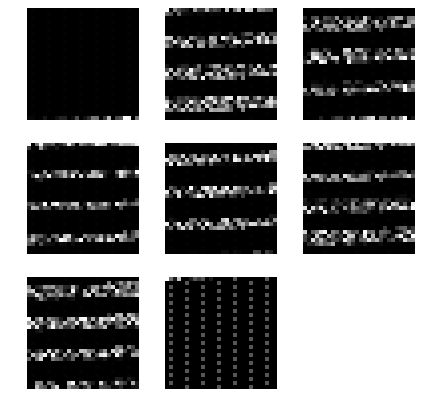

In [110]:
show_conv_img(conv_1)

img_data.shape: (16, 14, 14)
img_data dtype: uint8


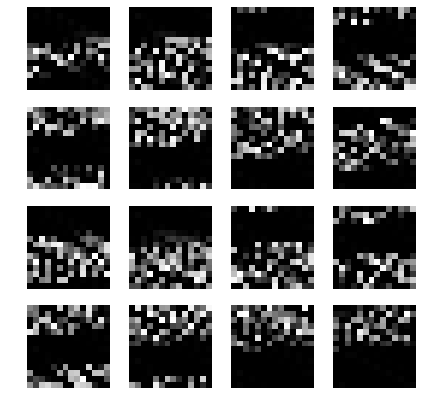

In [111]:
show_conv_img(conv_2)

img_data.shape: (32, 7, 7)
img_data dtype: uint8


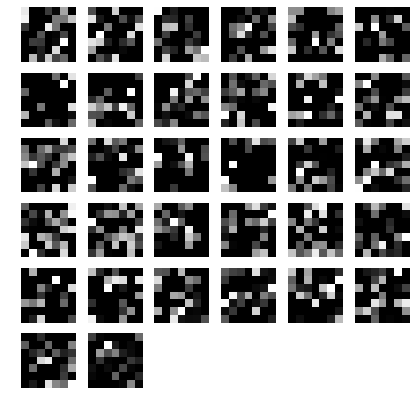

In [112]:
show_conv_img(conv_3)